In [1]:
%pylab inline
import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def panel3(cpu, ram, disk, title=None):
    f, axarr = plt.subplots(3, sharex=True)
    plot1, plot2, plot3 = axarr
    
    plot1.plot(cpu.timesec, cpu.puser, 'b-')
    plot1.set_ylabel('CPU load (%)')
    
    plot2.plot(ram.timesec, ram.kbmemused / 1e6, 'r-')
    plot2.set_ylabel('RAM (GB)')
        
    plot3.plot(disk.timesec, disk.tps, 'r-')
    plot3.set_ylabel('Disk IO (TPS)')
                     
    plot3.set_xlabel('Time (seconds)')
    
    f.set_size_inches(10, 8)
    
    if title:
        plot1.set_title(title)
   
    return f, axarr

In [3]:
import sarparse2
import gzip

In [4]:
# parse sar output
with gzip.open('output.sourmash/cpu.txt.gz', 'rt') as fp:
    all_cpu = sarparse2.parse_cpu(fp)
    
with gzip.open('output.sourmash/ram.txt.gz', 'rt') as fp:
    all_ram = sarparse2.parse_ram(fp)
    
with gzip.open('output.sourmash/disk.txt.gz', 'rt') as fp:
    all_disk = sarparse2.parse_disk(fp)

In [5]:
# parse bothie timelog
events = []
lines = open('output.sourmash/timelog.log').readlines()
lines = [ x.strip() for x in lines ]
for line in lines:
    tup = line.split()
    event = " ".join(tup[2:])
    
    # do a bad job of parsing date, because sar outputs silly dates anyway, so timezones etc don't matter
    timestr = tup[1]
    timestr = timestr.split('.')[0]
    timestr = timestr.split(':')
    hh, mm, ss = map(int, timestr)
    timesec = hh*3600 + mm*60 + ss
    events.append((timesec, event))
    
start_time = events[0][0] - 10
end_time = events[-1][0] + 10



In [6]:
def select_df_period(df, start_time, end_time):
    df = df[df.timesec >= start_time]
    df = df[df.timesec < end_time]
    df.timesec -= start_time
    return df
    
cpu = select_df_period(all_cpu, start_time, end_time)
ram = select_df_period(all_ram, start_time, end_time)
disk = select_df_period(all_disk, start_time, end_time)


(<Figure size 720x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'sourmash'}, ylabel='CPU load (%)'>,
        <AxesSubplot:ylabel='RAM (GB)'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='Disk IO (TPS)'>],
       dtype=object))

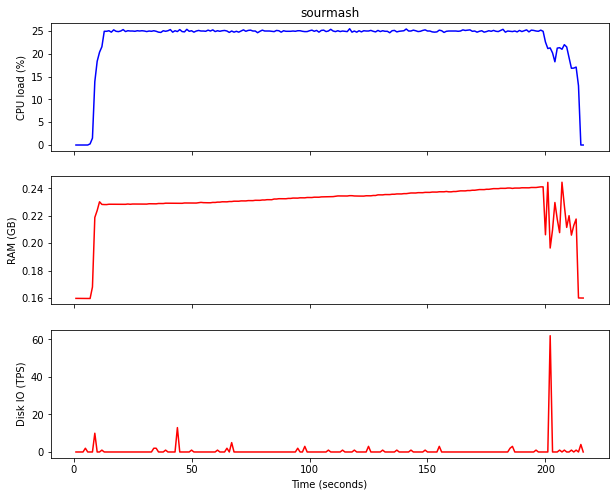

In [7]:
panel3(cpu, ram, disk, title='sourmash')